In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\nikik\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# creating path
path = r'C:\Users\nikik\achievement 6\boat_data_cleaned.csv'

In [3]:
#importing datafile
df = pd.read_csv(path)

In [4]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year,Length,Width,Material,Location,Number of views,price_clean
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Unknown,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3337.0
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3490.0
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,3770.0
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Unknown,Denmark Â» Svendborg,64,25900.0
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3399.0


In [5]:
# Drop non-analytical columns if present
df_vis = df.drop(columns=["Price"], errors="ignore")

In [6]:
df.shape

(9888, 11)

In [7]:
# Selecting numerical variables
num_vars = df_vis[['price_clean', 'Year', 'Length', 'Width', 'Number of views']]


# correlation matrix heatmap 

In [8]:
# Compute correlation matrix
corr_matrix = num_vars.corr()

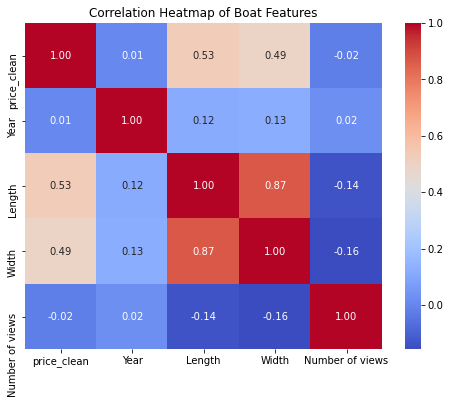

In [9]:
# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Boat Features")
plt.show()

# 
The heatmap shows the strength and direction of relationships between numerical variables. The strongest positive correlation is observed between boat length and width (0.87), which is expected for physical dimensions. Boat price has a moderate positive correlation with both length (0.53) and width (0.49), suggesting that larger boats tend to be priced higher. Other variables, including number of views, show weak or negligible correlations, indicating limited linear relationships.

# scatterplot for the variables with the strongest correlations 

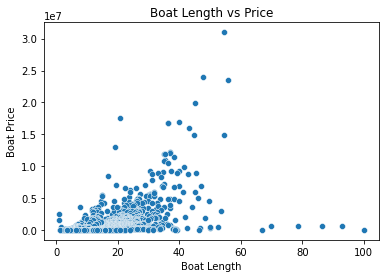

In [11]:
sns.scatterplot(x="Length", y="price_clean", data=df_vis)
plt.title("Boat Length vs Price")
plt.xlabel("Boat Length")
plt.ylabel("Boat Price")
plt.show()

# 
The scatterplot shows a generally positive relationship between the two variables, with most observations clustered at lower values and a smaller number of higher-value points. This suggests that as one variable increases, the other tends to increase as well, although the relationship is not strictly linear. The presence of several outliers indicates variability in the data, suggesting that additional factors may influence this relationship.

# Pair Plot of Entire Dataset (Numerical)

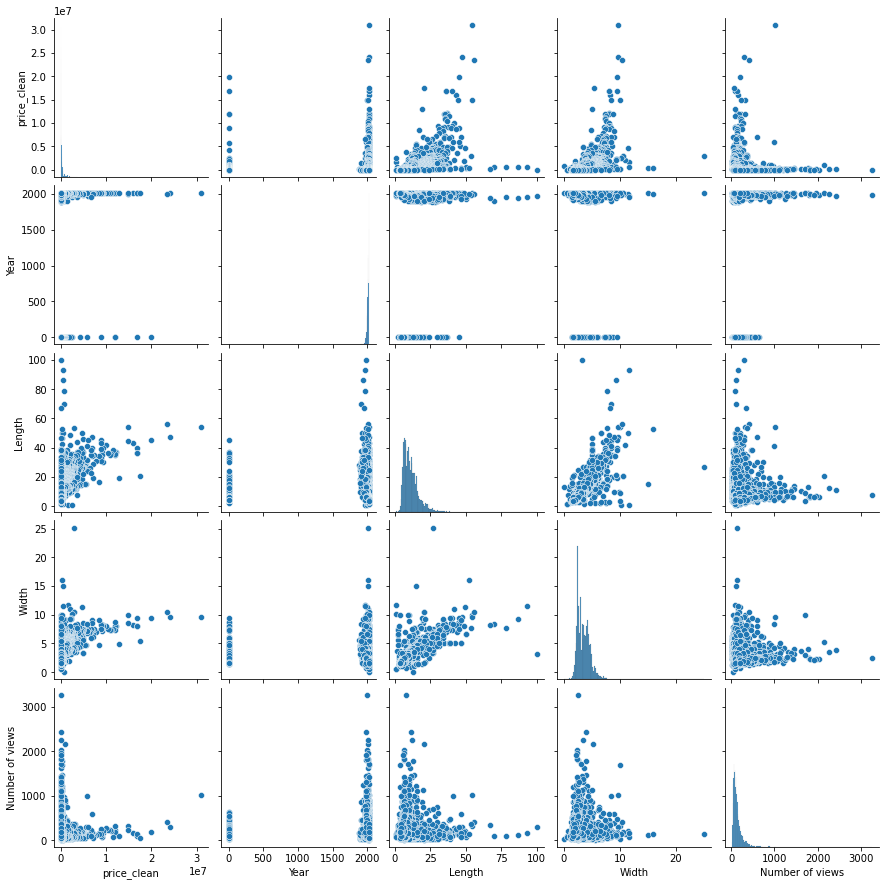

In [12]:
sns.pairplot(num_vars, diag_kind="hist")
plt.show()

# 
The pair plot shows that several numerical variables, particularly price, number of views, and boat dimensions, have right-skewed distributions, with most observations concentrated at lower values and a small number of high-value outliers. This indicates substantial variability within the dataset.
Clear positive relationships are visible between boat length and width, as well as between price and boat size, supporting the correlations observed earlier. In contrast, variables such as number of views show weaker and more dispersed relationships with price.
Based on these patterns, price, boat length, boat width, and year are selected for further exploration, as they show meaningful variation and clearer relationships that may help explain pricing differences. Variables with highly skewed distributions or weak associations, such as number of views, may require additional transformation or segmentation in later analysis.

In [22]:
# Set the 95th percentile as the upper limit
upper_limit = df_vis["price_clean"].quantile(0.95)

In [23]:
# Keep only rows where price is within the upper limit
df_no_outliers = df_vis[df_vis["price_clean"] <= upper_limit]

In [28]:
# Select top 10 boat type
top_boat_types = df_no_outliers["Boat Type"].value_counts().head(10).index

In [31]:
# filtering data
df_top = df_no_outliers[df_no_outliers["Boat Type"].isin(top_boat_types)]


# Categorical Plot

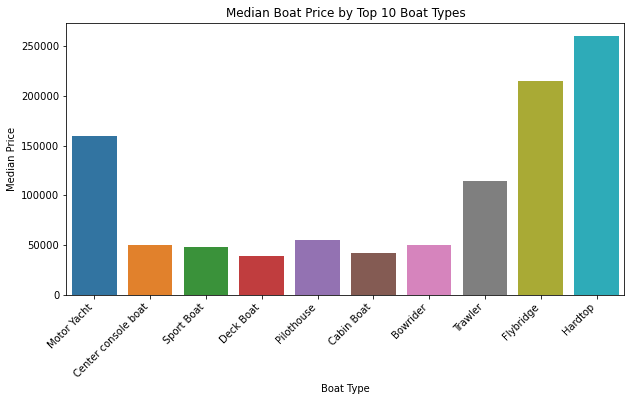

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(
    x="Boat Type",
    y="price_clean",
    data=df_top,
    estimator=np.median,
    ci=None
)
plt.xticks(rotation=45, ha="right")
plt.title("Median Boat Price by Top 10 Boat Types")
plt.xlabel("Boat Type")
plt.ylabel("Median Price")
plt.show()

# 
The bar chart shows clear differences in median boat prices across the selected boat types. Some categories have noticeably higher median prices, indicating that boat type plays an important role in price variation. Other boat types cluster at lower median prices, suggesting more budget-oriented segments of the market. Overall, the results highlight market segmentation, where pricing differs substantially depending on the type of boat.

# Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

#
1. How does boat age influence price, and does this relationship differ by boat type?
The exploratory analysis suggests that newer boats generally tend to be priced higher than older boats. However, the relationship between age and price is not strictly linear, and older boats still show a wide range of prices. This indicates that boat type and other characteristics likely influence how age affects price.

2. Do certain fuel types or manufacturers tend to be associated with higher-priced boats?
At this stage of exploration, no strong conclusions can be drawn regarding fuel type or manufacturer due to limited visual separation and high variability. While some manufacturers and fuel types appear in higher price ranges, further focused analysis is required to confirm consistent pricing patterns.

3. Does the dataset contain any personally identifiable information that could pose privacy concerns?
The dataset does not contain any personally identifiable information. All data relates to boat characteristics, pricing, and general locations, indicating minimal privacy or ethical concerns.

4. How do boat prices vary across different years in the dataset?
Boat prices show noticeable variation across production years, with newer boats generally appearing at higher price points. However, the spread of prices across years suggests that production year alone does not fully explain price differences.

5. Is there a relationship between boat size (length) and price?
Yes, a moderate positive relationship is observed between boat size and price. Larger boats tend to be more expensive, although the presence of variability and outliers indicates that additional factors beyond size influence pricing.

# New Questions Arising from Exploration
1. How does boat material influence pricing when controlling for size and age?

2. Are there regional or location-based differences in boat pricing?

3. Do newer boats of specific types depreciate differently compared to others?

4. How do manufacturer and boat type interact to influence price?

#  hypotheses
1. Boat size hypothesis
Boats with greater length are associated with higher prices compared to smaller boats.

2. Boat age hypothesis
Newer boats tend to have higher prices than older boats, although this relationship may vary by boat type.

3. Boat type hypothesis
Boat type significantly influences price, with certain boat categories having consistently higher median prices than others.

4. Manufacturer and fuel type hypothesis
Boats from certain manufacturers or with specific fuel types are associated with higher prices compared to others.

5. Popularity vs price hypothesis
There is no strong relationship between the number of views a boat receives and its price.